# Task 8
Scrivere un programma che (a) data una matrice di similarta’subject-subject, (b) un valore n, e (c) un valore m,

- crei un grafo di similarta’, G(V, E), in cui V corresponde all’insieme dei soggetti nel database ed E contiene le coppie di vertici vi, vj per cui vale che , vj e’ uno degli n soggetti piu simili a vi nel database
- identifichi gli m soggetti piu’ significativi nella collezione (utilizzando l’algoritmo di page- rank) .

Link utile: https://www.youtube.com/watch?v=P8Kt6Abq_rM


In [63]:
from ipynb.fs.full.functions_secondaparte import *
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
import operator

In [64]:
def truncate(number: float, digits: int) -> float:
    pow10 = 10 ** digits
    return number * pow10 // 1 / pow10

Graph with 4 nodes and 3 edges


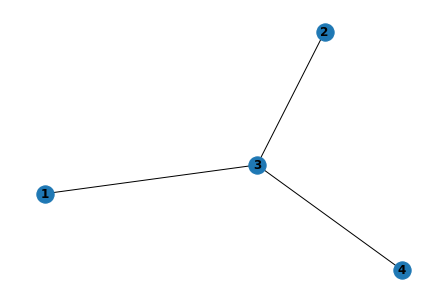

In [65]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
#G = nx.random_geometric_graph(200, 0.125)
m = [1, 2, 3, 4]
G.add_nodes_from(m)
#G.add_edge(2, 3)
#G.add_edge(3, 4)
#G.add_edge(3, 1)
G.add_edges_from([(2, 3), (3, 4), (3, 1)])
nx.draw(G, with_labels=True, font_weight='bold')
#e = (2, 3)
#G.add_edge(*e)
#G.clear()  # unpack edge tuple*
print(G)

In [66]:
similarityMatrix = createSimilarityMatrix('HOG', 'soggetto')

HOG
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
[array([0.28321082, 0.10663195, 0.08072711, ..., 0.04903915, 0.10118795,
       0.14536537]), array([0.3098579 , 0.10496397, 0.05921476, ..., 0.04093335, 0.07550864,
       0.1429913 ]), array([0.2974024 , 0.10383666, 0.06895002, ..., 0.03937106, 0.07974439,
       0.12870083]), array([0.31694175, 0.1196924 , 0.0637441 , ..., 0.04705948, 0.08741514,
       0.15727276]), array([0.32077464, 0.11390864, 0.06571554, ..., 0.03773756, 0.07263743,
       0.13532672]), array([0.30537497, 0.10473273, 0.05674065, ..., 0.03578705, 0.07638619,
       0.14201219]), array([0.31133249, 0.09326633, 0.05214979, ..., 0.03875541, 0.07708643,
       0.1566328 ]), array([0.33268281, 0.11117169, 0.05669145, ..., 0.03417831, 0.06387914,
       0.12890729]), array([0.31887448, 0

In [67]:
def createGraph(similarityMatrix, n, m):
    G = nx.Graph()
    listOfSubject = list(range(0,39+1))

    print(listOfSubject)

    G.add_nodes_from(listOfSubject)

    for i in range(len(similarityMatrix)):
        similarityOfSubject = similarityMatrix[i]
        
        listOfSimilarity = []
        for j in range(len(similarityOfSubject)):
            pair = (j, similarityOfSubject[j])
            listOfSimilarity.append(pair)
        
        del listOfSimilarity[i]

        sequenzaOrdinata = sorted(listOfSimilarity, key=lambda x: x[1], reverse=True)

        # print(sequenzaOrdinata)
        # print("\n")

        for k in range(n):
            G.add_edge(i, sequenzaOrdinata[k][0])

    return G
        #[(0, 0.33), (1, 0.45), ...., (40, 0.99)]

In [68]:
m = 10
graph = createGraph(similarityMatrix, 5, m)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


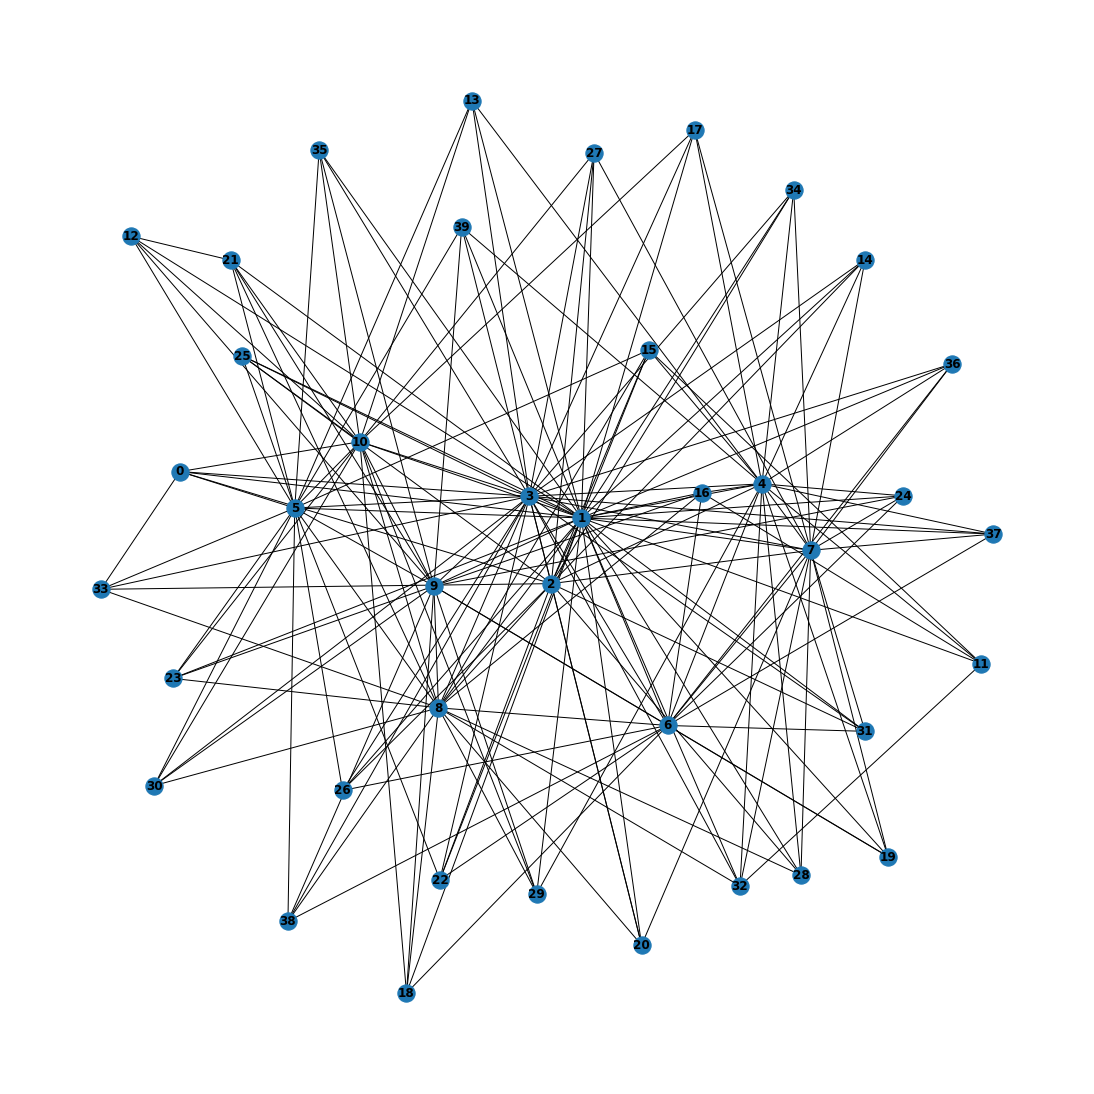

In [69]:
# larger figure size
plt.figure(3,figsize=(15,15)) 
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [70]:
print("STAMPA DEGLI ARCHI DEL GRAFO")
print(list(graph.edges))

STAMPA DEGLI ARCHI DEL GRAFO
[(0, 2), (0, 1), (0, 3), (0, 5), (0, 10), (0, 33), (1, 3), (1, 4), (1, 9), (1, 6), (1, 8), (1, 2), (1, 5), (1, 7), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 31), (1, 32), (1, 34), (1, 35), (1, 36), (1, 37), (1, 39), (2, 3), (2, 4), (2, 7), (2, 8), (2, 14), (2, 15), (2, 20), (2, 22), (2, 25), (2, 26), (2, 27), (2, 28), (2, 31), (2, 33), (2, 34), (3, 6), (3, 7), (3, 5), (3, 8), (3, 4), (3, 9), (3, 10), (3, 13), (3, 14), (3, 17), (3, 20), (3, 22), (3, 25), (3, 26), (3, 27), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 38), (3, 39), (4, 7), (4, 6), (4, 11), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 19), (4, 24), (4, 28), (4, 29), (4, 32), (4, 34), (4, 36), (4, 37), (4, 39), (5, 10), (5, 9), (5, 8), (5, 12), (5, 13), (5, 15), (5, 21), (5, 22), (5, 23), (5, 25), (5, 26), (5, 30), (5, 33

In [71]:
result = pagerank(graph)

In [72]:
sorted_result = sorted(result.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in ascending order by value : ',sorted_result)

Dictionary in ascending order by value :  [(1, 0.09189462214392771), (3, 0.07169150749248568), (4, 0.05269112774746963), (5, 0.05003432029414389), (8, 0.04945120599245935), (9, 0.04728056753998969), (7, 0.045070816147774403), (2, 0.04501726175334633), (10, 0.044990613735237175), (6, 0.04223462250433685), (15, 0.017511403616700675), (16, 0.017498547465203275), (32, 0.01745205507690276), (21, 0.017421256601993406), (0, 0.017400905259500325), (11, 0.01559114071658748), (12, 0.015108498860016287), (33, 0.015093138624342702), (19, 0.014889302357476635), (24, 0.014889302357476635), (28, 0.01487605298386267), (30, 0.014859463781840217), (18, 0.014858180071281497), (29, 0.014853855794861807), (38, 0.014853636724230429), (23, 0.014852856665385123), (27, 0.014850278130511305), (31, 0.014844451072901516), (14, 0.014840126796481824), (34, 0.014840126796481824), (17, 0.014838792337569039), (25, 0.014835110035398058), (36, 0.01483296527995925), (37, 0.01483296527995925), (22, 0.01482928297778827), (

In [73]:
firstM = sorted_result[0:m]

In [74]:
firstM

[(1, 0.09189462214392771),
 (3, 0.07169150749248568),
 (4, 0.05269112774746963),
 (5, 0.05003432029414389),
 (8, 0.04945120599245935),
 (9, 0.04728056753998969),
 (7, 0.045070816147774403),
 (2, 0.04501726175334633),
 (10, 0.044990613735237175),
 (6, 0.04223462250433685)]

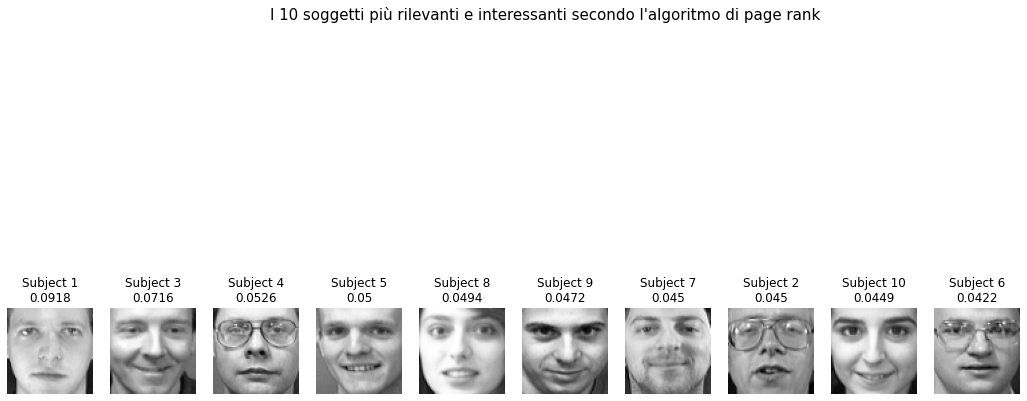

In [75]:

import math
# numero di immagini simili che vogliamo ottenere
k = 5

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

fig = plt.figure(figsize=(20, 10))
fig.suptitle('I ' + str(m) + ' soggetti più rilevanti e interessanti secondo l\'algoritmo di page rank ', fontsize=15)
# plt.axis('off')
currentIndex = 1

for j in range(len(firstM)):
    imageName = 'image-original-' + str(firstM[j][0]) + '-1.png'
    # load the image
    image = Image.open('./secondaparte/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Subject ' + str(firstM[j][0]) + "\n" +
              str(truncate(firstM[j][1],4)))

    currentIndex += 1

plt.show()
